RMSE pour la méthode de Gauss (Directe) : 2.3626213757908565e-14
RMSE pour la méthode de Lagrange : 0.0
RMSE pour la méthode de Newton : 0.0


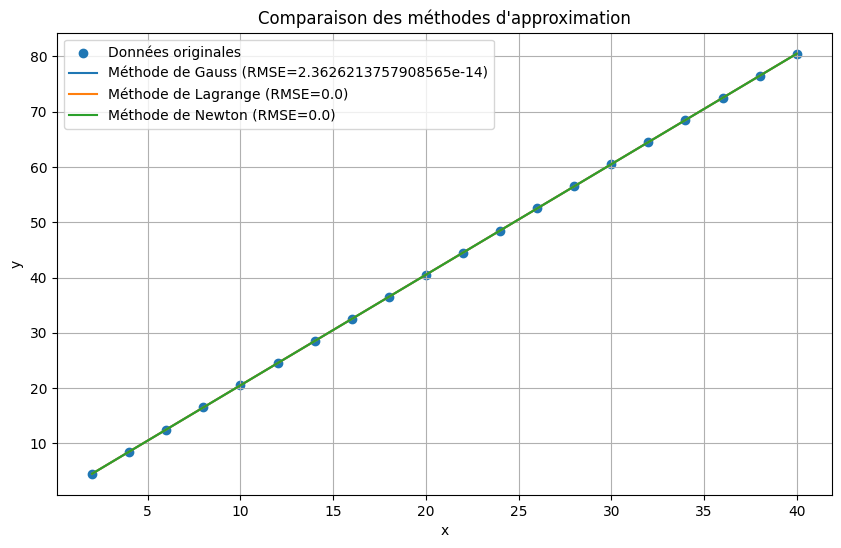

In [7]:
import numpy as np
import matplotlib.pyplot as plt



# Mes données sont : Pour X les 20 premiers nombres impairs et pour Y = X * 1.5
x_data = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39])
y_data = np.array([1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5, 34.5, 37.5, 40.5, 43.5, 46.5, 49.5, 52.5, 55.5, 58.5])

# Méthode de Gauss
coefficients_gauss = np.polyfit(x_data, y_data, deg=5)

# Méthode de Lagrange
def lagrange_interpolation(x, x_data, y_data):
    n = len(x_data)
    result = 0
    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if j != i:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result

# Méthode de Newton
def divided_difference(x_data, y_data):
    n = len(x_data)
    F = np.zeros((n, n))
    F[:,0] = y_data
    for j in range(1,n):
        for i in range(n-j):
            F[i,j] = (F[i+1,j-1] - F[i,j-1]) / (x_data[i+j] - x_data[i])
    return F[0]

def newton_interpolation(x, x_data, y_data):
    a = divided_difference(x_data, y_data)
    n = len(x_data) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k]) * p
    return p

# Calcul de l'erreur
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calcul des valeurs prédites pour chaque méthode
y_pred_gauss = np.polyval(coefficients_gauss, x_data)
y_pred_lagrange = lagrange_interpolation(x_data, x_data, y_data)
y_pred_newton = [newton_interpolation(xi, x_data, y_data) for xi in x_data]

# Calcul des RMSE pour chaque méthode
rmse_gauss = calculate_rmse(y_data, y_pred_gauss)
rmse_lagrange = calculate_rmse(y_data, y_pred_lagrange)
rmse_newton = calculate_rmse(y_data, y_pred_newton)

# Affichage des résultats
print("RMSE pour la méthode de Gauss (Directe) :", rmse_gauss)
print("RMSE pour la méthode de Lagrange :", rmse_lagrange)
print("RMSE pour la méthode de Newton :", rmse_newton)

# Comparaison visuelle
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Données originales')
plt.plot(x_data, y_pred_gauss, label=f'Méthode de Gauss (RMSE={rmse_gauss})')
plt.plot(x_data, y_pred_lagrange, label=f'Méthode de Lagrange (RMSE={rmse_lagrange})')
plt.plot(x_data, y_pred_newton, label=f'Méthode de Newton (RMSE={rmse_newton})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparaison des méthodes d\'approximation')
plt.legend()
plt.grid(True)
plt.show()